In [152]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [149]:
SAcrimedata_df = pd.read_csv('50kmradius_data_clean.csv')
SAcrimedata_df['Date'] = pd.to_datetime(SAcrimedata_df['Date'], format='%Y-%m-%d')
SAcrimedata_df.head()


,Date,Suburb,Postcode,Offence Level 1 Description,Offence Level 2 Description,Offence Count,Distance from CBD (km)
0,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,1,0.0
1,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,1,0.0
2,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,2,0.0
3,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,1,0.0
4,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,2,0.0


In [126]:
start_monthdate = pd.to_datetime('2022-07-01')
end_monthdate = pd.to_datetime('2022-07-30')
format='%Y-%m-%d'
filtered_july_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
start_monthdate_2023 = pd.to_datetime('2023-07-01')
end_monthdate_2023 = pd.to_datetime('2023-07-30')
filtered_july_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate_2023)&(SAcrimedata_df['Date']>start_monthdate_2023), :]

if filtered_july_2022df.empty & filtered_july_2023df.empty == True:
    print("no offenses recorded for july 2022 and 2023");
    
elif filtered_july_2022df.empty & filtered_july_2023df.empty == False:
    sumof_offs_july = filtered_july_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_july_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_july}")
    sumof_offs_july_2023 = filtered_july_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate_2023.strftime(format)}-{end_monthdate_2023.strftime(format)}: {filtered_july_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_july_2023}")
    
   # print(filtered_july_2022df)

number of offenses recorded within 2022-07-01-2022-07-30: 38234
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      5441
OFFENCES AGAINST THE PERSON    1193
Name: Offence Count, dtype: int64
number of offenses recorded within 2023-07-01-2023-07-30: 0
num of offenses for this month is: Series([], Name: Offence Count, dtype: int64)


In [127]:

grouped_date_peryear = SAcrimedata_df.groupby(SAcrimedata_df['Date'].dt.year)['Offence Count'].sum()
numberof_offenses_pertype = SAcrimedata_df.groupby(SAcrimedata_df['Date'].dt.year)['Offence Level 1 Description'].value_counts()
grouped_date_peryear
grouped_date_permonth = SAcrimedata_df.groupby(SAcrimedata_df['Date'].dt.month)['Offence Count'].sum()
grouped_date_permonth
grouped_date_peryear
offences_pertype = pd.DataFrame(numberof_offenses_pertype)
offences_pertype.reset_index()
offences_pertype

count
Date Offence Level 1 Description       
2022 OFFENCES AGAINST PROPERTY    30170
     OFFENCES AGAINST THE PERSON   7630
2023 OFFENCES AGAINST PROPERTY    31936
     OFFENCES AGAINST THE PERSON   7720

([<matplotlib.patches.Wedge at 0x16c5cd85410>,
 [Text(0.3741997168407939, 1.0343957520776417, '2022_PROPERTY'),
  Text(-1.0195817812127714, 0.4128595298875786, '2022_PERSON'),
  Text(-0.37797318760836407, -1.0330228794412892, '2023_PROPERTY'),
  Text(1.046514523171683, -0.33883233728607565, '2023PERSON')],
 [Text(0.20410893645861483, 0.5642158647696227, '39.0%'),
  Text(-0.556135517025148, 0.22519610721140648, '9.9%'),
  Text(-0.20616719324092583, -0.5634670251497941, '41.2%'),
  Text(0.5708261035481907, -0.1848176385196776, '10.0%')])

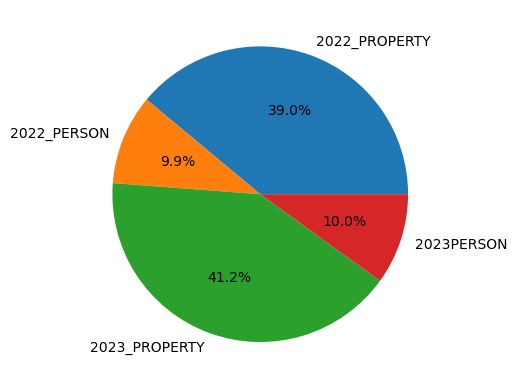

In [128]:
labels = ['2022_PROPERTY','2022_PERSON','2023_PROPERTY', '2023PERSON']
size = offences_pertype['count'].array
fig, ax = plt.subplots()
ax.pie(size, labels=labels, autopct='%1.1f%%')


In [129]:
start_monthdate = pd.to_datetime('2022-06-01')
end_monthdate = pd.to_datetime('2022-06-30')
format='%Y-%m-%d'
filtered_june_2022df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
if filtered_june_2022df.empty == True:
    print("no offenses recorded for june 2022, checking 2023");
    start_monthdate = pd.to_datetime('2023-06-01')
    end_monthdate = pd.to_datetime('2023-06-30')
    filtered_june_2023df = SAcrimedata_df.loc[(SAcrimedata_df['Date']<end_monthdate)&(SAcrimedata_df['Date']>start_monthdate), :]
    sumof_offs_june_2023 = filtered_june_2023df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_june_2023df.size}")
    print(f"num of offenses for this month is: {sumof_offs_june_2023}")
else:
    sumof_offs_june = filtered_june_2022df.groupby("Offence Level 1 Description")["Offence Count"].sum()
    print(f"number of offenses recorded within {start_monthdate.strftime(format)}-{end_monthdate.strftime(format)}: {filtered_june_2022df.size}")
    print(f"num of offenses for this month is: {sumof_offs_june}")


no offenses recorded for june 2022, checking 2023
number of offenses recorded within 2023-06-01-2023-06-30: 42798
num of offenses for this month is: Offence Level 1 Description
OFFENCES AGAINST PROPERTY      6222
OFFENCES AGAINST THE PERSON    1325
Name: Offence Count, dtype: int64


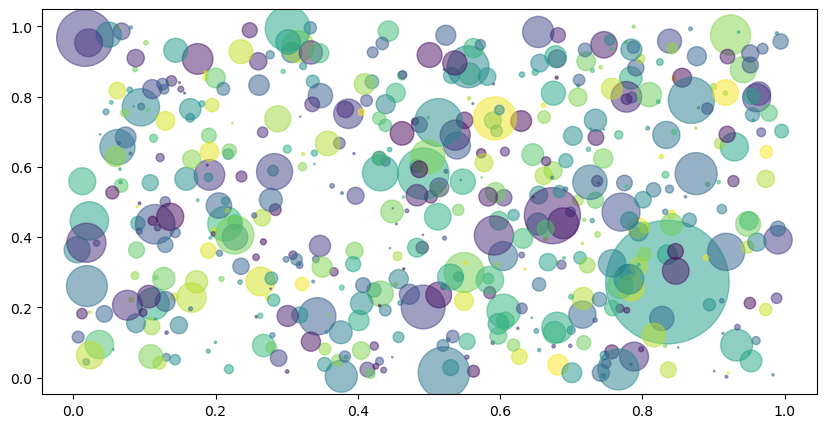

In [159]:
suburb_offence = SAcrimedata_df.groupby('Suburb')['Offence Count'].sum()
suburb_offence_df = pd.DataFrame(suburb_offence)
offencecount=suburb_offence_df['Offence Count'].array
xaxis = suburb_offence_df.index.array
x = np.random.rand(547)
y= np.random.rand(547)
colors = np.random.rand(547)
fig, ax = plt.subplots(figsize = (10, 5))
plt.scatter(x, y, c=colors, s= offencecount, alpha=0.5)
plt.show()
#scatter plot with bubble size as offence count

In [ ]:
#scatter plot with hover text
